## Q1. You are working on a machine learning project where you have a dataset containing numerical and categorical features. You have identified that some of the features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates the feature engineering process and handles the missing values.

### Design a pipeline that includes the following steps:
 - Use an automated feature selection method to identify the important features in the dataset
 - Create a numerical pipeline that includes the following steps:
     - Impute the missing values in the numerical columns using the mean of the column values
     - Scale the numerical columns using standardisation
 - Create a categorical pipeline that includes the following steps:
     - Impute the missing values in the categorical columns using the most frequent value of the column
     - One-hot encode the categorical columns
 - Combine the numerical and categorical pipelines using a ColumnTransformer
 - Use a Random Forest Classifier to build the final model
 - Evaluate the accuracy of the model on the test dataset

#### Note: Your solution should include code snippets for each step of the pipeline, and a brief explanation of each step. You should also provide an interpretation of the results and suggest possible improvements for the pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(filepath_or_buffer="./data/dataset/Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1470, 35)


In [4]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

##### Let's get some info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### So, there is no null or missing value in the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df["Attrition"] = df["Attrition"].map({'Yes':1,'No':0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Filtering out the numerical and categorical features

In [9]:
numerical_features = list(df.select_dtypes(exclude='object').columns)
categorical_features = list(df.select_dtypes(include='object').columns)

In [10]:
len(numerical_features), len(categorical_features)

(27, 8)

##### Removing Attrition column from numerical feature since it will not be a part of X_train or X_test later

In [11]:
numerical_features.remove("Attrition")
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Creating the pipeline for transforming numerical and categorical features

In [13]:
numerical_features_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_features_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
        ('encoding', OneHotEncoder(sparse_output=False))
    ]
)

##### Combining these transformers using ColumnTransformer

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_features_transformer, numerical_features),
        ('categorical', categorical_features_transformer, categorical_features)
    ],
    verbose=True
)

##### Create a pipeline with preprocessor, feature selector and a classifier

In [15]:
feature_selector_rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

classifier = RandomForestClassifier(n_estimators=500, max_depth=15, oob_score=True)

In [16]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector_rfe),
        ('classifier', RandomForestClassifier())
    ]
)

##### Splitting the dataset

In [17]:
X = df.drop(labels=['Attrition'], axis=1)
Y = df['Attrition']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"The training dataset shape:{X_train.shape}, {y_train.shape}")
print(f"The test dataset shape:{X_test.shape}, {y_test.shape}")

The training dataset shape:(1029, 34), (1029,)
The test dataset shape:(441, 34), (441,)


In [19]:
pipeline.fit(X_train, y_train)

[ColumnTransformer] ..... (1 of 2) Processing numerical, total=   0.0s
[ColumnTransformer] ... (2 of 2) Processing categorical, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EmployeeNumber',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   '...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18', 'OverTime'])],
                                   verbose=True)),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('classifier', RandomForestClassifier())])

In [20]:
y_pred = pipeline.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:{acc}")
print(f"Precision:{prec}")
print(f"Recall:{recall}")
print(f"F1_score:{f1}")

Accuracy:0.8639455782312925
Precision:0.5555555555555556
Recall:0.08196721311475409
F1_score:0.14285714285714285


In [24]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[376,   4],
       [ 56,   5]], dtype=int64)

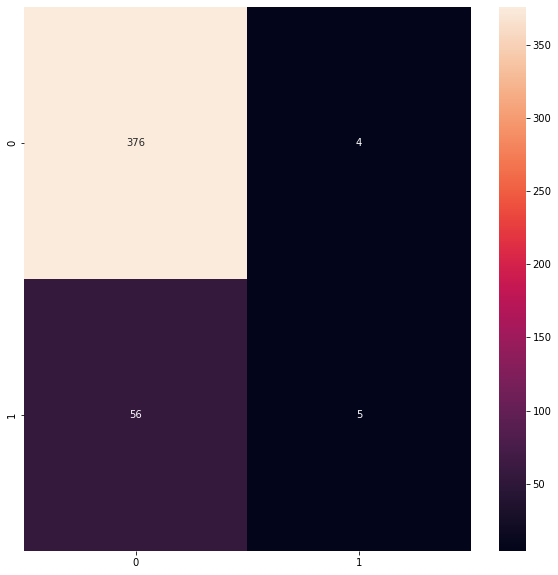

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(cf, annot=True, fmt='d')
plt.show()

## Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its accuracy

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()

In [29]:
X = iris.data
Y = iris.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"The training dataset shape:{X_train.shape}, {y_train.shape}")
print(f"The test dataset shape:{X_test.shape}, {y_test.shape}")

The training dataset shape:(120, 4), (120,)
The test dataset shape:(30, 4), (30,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

##### Creating a pipeline

In [47]:
pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('ensemble', VotingClassifier(
                estimators=[
                    ('rf', rf),
                    ('lr', lr)
                ],
                voting='soft'
            )
        )
    ]
)

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ensemble',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('lr',
                                               LogisticRegression(random_state=42))],
                                  voting='soft'))])

In [49]:
y_pred = pipeline.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, y_pred)

print(f"Accuracy:{acc}")

Accuracy:1.0


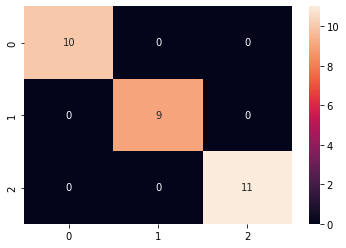

In [52]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt='d')
plt.show()